In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h1>Amazon Sports Products Reviews Analysis</h1>

<h2> Data Overview</h2>
<br>
<p>This dataset is a dense subset that contains products reviews and some metadata from Amazon sports and outdoors department, including 296,337 million reviews spanning from 2002 to July 2014. Because it is a toyset, such that each of the remaining users and items have 5 reviews each, the sports activity trendency analysis may not totally correct. However, the sentiment analysis should work fine in real world.</p>  

In [2]:
data = pd.read_json("Sports_and_Outdoors_5.json", lines=True)

In [3]:
pd.set_option('display.max_colwidth', -1)
data.head(1)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,1881509818,"[0, 0]",5,"This came in on time and I am veru happy with it, I haved used it already and it makes taking out the pins in my glock 32 very easy","01 26, 2014",AIXZKN4ACSKI,David Briner,Woks very good,1390694400


In [4]:
del data["unixReviewTime"]
del data["reviewerName"]
del data["helpful"]
del data["reviewerID"]

In [5]:
data.head(1)

,asin,overall,reviewText,reviewTime,summary
0,1881509818,5,"This came in on time and I am veru happy with it, I haved used it already and it makes taking out the pins in my glock 32 very easy","01 26, 2014",Woks very good


In [6]:
# check how many reviews in data set
data.shape

(296337, 5)

In [7]:
# check if there is nan value in dataframe
data.isnull().values.any()

False

In [8]:
# check datatype of each column
print data.dtypes

asin          object
overall       int64 
reviewText    object
reviewTime    object
summary       object
dtype: object


<h2>Basic Exploration</h2>
<br>
<h3>1. Number of Reviewed Products</h3>
<p>First, let's see how many unique products in this data set.

In [9]:
# the number of unique products in dataset
print data.asin.unique().shape

(18357L,)


<p>These 296,337 reviews covered 18,357 products. On average, each product has 16 reviews.</p>

<h3>2. Rating Distribution</h3>
<br>
<p>Next, let's see how the user ratings are distributed among the reviews.</p>

In [10]:
rating_distribution = data.groupby(["overall"]).size()
print type(rating_distribution)
rating_distribution

<class 'pandas.core.series.Series'>


overall
1    9045  
2    10204 
3    24071 
4    64809 
5    188208
dtype: int64

In [11]:
rating_percentage = data["overall"].value_counts(normalize=True).apply(lambda x: np.around((x * 100), 2))
# set_option just can modify the display of data frame, not data itself
# pd.options.display.float_format = '{:,.2f}%'.format
print rating_percentage

5    63.51
4    21.87
3    8.12 
2    3.44 
1    3.05 
Name: overall, dtype: float64


In [12]:
rating_percentage = rating_percentage.astype(str).apply(lambda x: x + "%")
rating_percentage

5    63.51%
4    21.87%
3    8.12% 
2    3.44% 
1    3.05% 
Name: overall, dtype: object

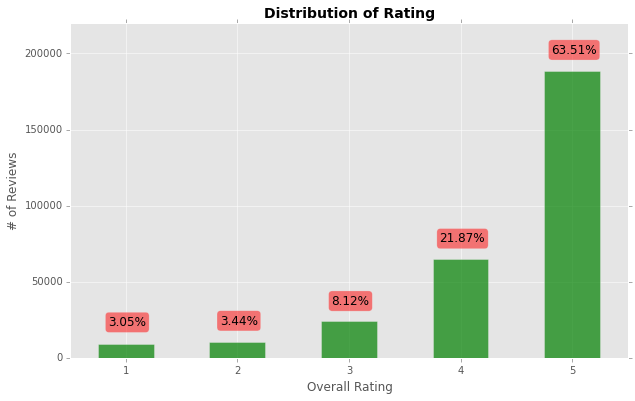

In [13]:
import matplotlib
with plt.style.context(('ggplot')):
    #matplotlib.style.use('ggplot')

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)

    rating_distribution.plot.bar(alpha=0.7, color="g")
    plt.grid(True)
    plt.ylim((0, 220000))

    box_style = {'facecolor':'red', 'alpha':0.5, 'boxstyle':'round, pad=0.3'}
    ax.text(3.82, 200000, rating_percentage.iloc[0], bbox=box_style, fontsize=12)
    ax.text(2.82, 76000, rating_percentage.iloc[1], bbox=box_style, fontsize=12)
    ax.text(1.85, 35000, rating_percentage.iloc[2], bbox=box_style, fontsize=12)
    ax.text(0.85, 22000, rating_percentage.iloc[3], bbox=box_style, fontsize=12)
    ax.text(-0.15, 21000, rating_percentage.iloc[4], bbox=box_style, fontsize=12)

    plt.xticks(rotation=0)
    plt.title("Distribution of Rating", fontsize=14, fontweight="bold")
    plt.xlabel("Overall Rating")
    plt.ylabel("# of Reviews")

<p>More than $60\%$ of the reviews gave a 5-star rating. 4-star accounted for $21.87\%$. There are very few 1-star to 3-star relatively. We can conclude that most online reviewers like to give positive feedbacks on the merchandise they bought.</p> 

<h3>3. Number of Reviews Changes Over Years</h3>
<br>
<p>We can expect the number of reviews should grow year by year with the popularity of online shopping. But how fast this increase happened? I try to find it from a line chart.</p>

In [14]:
# extract year from time tag
data["reviewYear"] = data["reviewTime"].str.split(",").apply(lambda x: x[1])
del data["reviewTime"]
data["reviewYear"] = data["reviewYear"].astype(int)
data.head(3)

,asin,overall,reviewText,summary,reviewYear
0,1881509818,5,"This came in on time and I am veru happy with it, I haved used it already and it makes taking out the pins in my glock 32 very easy",Woks very good,2014
1,1881509818,5,"I had a factory Glock tool that I was using for my Glock 26, 27, and 17. I've since lost it and had needed another. Since I've used Ghost products prior, and know that they are reliable, I had decided to order this one. Sure enough, this is just as good as a factory tool.",Works as well as the factory tool,2012
2,1881509818,4,"If you don't have a 3/32 punch or would like to have one in your Glock bag, this is okay. The butt end of it is handy for pushing pins back in place. If you already have a 3/32 punch and don't need another, don't both with this one.","It's a punch, that's all.",2012


In [15]:
count_by_year = data["reviewYear"].value_counts().sort_index()
count_by_year

2002    4     
2003    14    
2004    13    
2005    85    
2006    242   
2007    788   
2008    1547  
2009    3236  
2010    8171  
2011    21943 
2012    50366 
2013    133157
2014    76771 
Name: reviewYear, dtype: int64

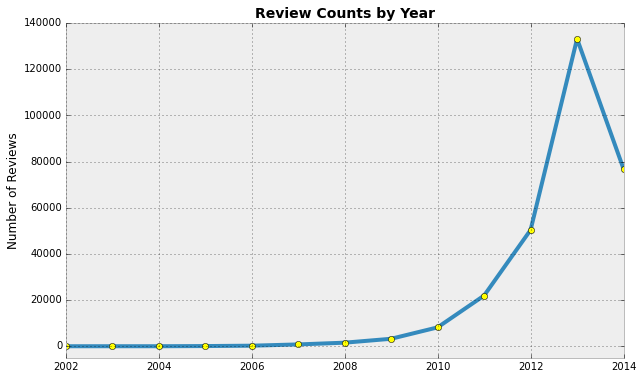

In [16]:
with plt.style.context(('bmh')):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)

    plt.ylim(-5000, 140000)
    plt.title("Review Counts by Year", fontsize=14, fontweight="bold")
    plt.ylabel("Number of Reviews")

    count_by_year.plot(marker="o", markersize=6, markerfacecolor="yellow", lw=4)

<p>There is a sagging tail on the line because the data in 2014 is just collected till July. We ignore the number of 2014 as it not complete. We can determine the increase speed by checking the steepness of line. From 2002 to 2008, there is almost no change on review numbers. But since 2009, the interval between yellow markers is getting steeper year by year. It indicates the yearly increase rate is always bigger than last year. Especially the interval between 2012 and 2013, the slope of line is more than twice of 2011-2012 interval.</p>

<h2>Most Reviewed Product</h2>
<br>
<p>Assuming the products with more reviews have larger market share. We can retrieve the top 10 popular products by collecting top 10 reviewed prodects.</p>

In [17]:
number_of_reviews = data["asin"].value_counts()
number_of_reviews.head(10)

B001HBHNHE    1042
B001T7QJ9O    763 
B000S5ODN2    647 
B0010O748Q    513 
B0000C50K3    427 
B002ZYRV2E    401 
B002OKWHVO    398 
B000GCRWCG    393 
B001HBHNHY    372 
B0035L35A8    359 
Name: asin, dtype: int64

<h2>Sports Activity Tendency</h2>
<br>

In [18]:
data.dtypes

asin          object
overall       int64 
reviewText    object
summary       object
reviewYear    int32 
dtype: object

<p>I set 2010 as the turnning point. By exploring the popular products in different time periods, we can speculate what the prevalent sports are on that time.</p>

In [19]:
data_filter_before_include_2010 = data["reviewYear"] <= 2010

In [20]:
data_before_include_2010 = data[data_filter_before_include_2010]
print data_before_include_2010.shape
# data_before_include_2010.head()

(14100, 5)


In [21]:
data_filter_after_2010 = data["reviewYear"] > 2010
data_after_2010 = data[data_filter_after_2010]
print data_after_2010.shape
# data_after_2010.head()

(282237, 5)


In [22]:
number_of_reviews_before_include_2010 = data_before_include_2010["asin"].value_counts()
# number_of_reviews_before_include_2010.head(14)

<p>This data set does not provide product description and title. I did not find the data source including ASIN and title for Amazon either. So I searched ASIN from Amazon website. There are some blanks maybe due to uncompleted database or the product has been out of market. I collect the first 10 most reviewed products with title as sports tendency indicator.</p>

In [23]:
title_before_2010 = ["Wireless N300 Mbps Extreme-N Gigabit Router", 
                    "Klean Kanteen Stainless Steel Water Bottle", 
                    "Omron HJA-301 Pace and Distance Tracker", 
                    "", 
                    "Bicycle Blinky Light", 
                    "Perfect Pushup - Original", 
                    "", 
                    "", 
                    "Polar Bottle Insulated Water Bottle", 
                    "Liner Lock Folding Knife",
                    "Road Morph G Mini Pump", 
                    "Rothco 550lb. Type III Nylon Paracord", 
                    "",
                    "P90X DVD Workout - Base Kit"]

In [24]:
data_agg_before_2010 = data_before_include_2010.groupby("asin", as_index=False).agg({"overall": ["count", "mean"]})
# ravel returns a contigious flattened array
data_agg_before_2010.columns = ["_".join(x) for x in data_agg_before_2010.columns.ravel()]
data_agg_before_2010.rename(columns={"asin_": "asin"}, inplace=True)
# data_agg_before_2010.head()

In [25]:
top10_before_2010 = data_agg_before_2010.sort_values("overall_count", ascending=False).head(14)
top10_before_2010 = top10_before_2010.assign(title=pd.Series(title_before_2010).values)
top10_before_2010['title'].replace('', np.nan, inplace=True)
top10_before_2010.dropna(subset=['title'], inplace=True)
# pd.set_option('display.max_colwidth', -1)
top10_before_2010

,asin,overall_count,overall_mean,title
1735,B000LIFB7S,59,4.288136,Wireless N300 Mbps Extreme-N Gigabit Router
1362,B000FN7UWS,56,4.178571,Klean Kanteen Stainless Steel Water Bottle
4929,B003IHWKSC,53,4.094340,Omron HJA-301 Pace and Distance Tracker
1677,B000KBEH1W,44,4.545455,Bicycle Blinky Light
1685,B000KDM3BG,43,4.604651,Perfect Pushup - Original
764,B000AO5L8W,36,4.277778,Polar Bottle Insulated Water Bottle
2310,B000UUV1EY,33,4.181818,Liner Lock Folding Knife
1293,B000FI6YOS,32,4.312500,Road Morph G Mini Pump
2215,B000S5ODN2,32,4.625000,Rothco 550lb. Type III Nylon Paracord
1224,B000FA1B9O,32,4.906250,P90X DVD Workout - Base Kit


In [26]:
top10_before_2010[["title", "overall_count"]]

,title,overall_count
1735,Wireless N300 Mbps Extreme-N Gigabit Router,59
1362,Klean Kanteen Stainless Steel Water Bottle,56
4929,Omron HJA-301 Pace and Distance Tracker,53
1677,Bicycle Blinky Light,44
1685,Perfect Pushup - Original,43
764,Polar Bottle Insulated Water Bottle,36
2310,Liner Lock Folding Knife,33
1293,Road Morph G Mini Pump,32
2215,Rothco 550lb. Type III Nylon Paracord,32
1224,P90X DVD Workout - Base Kit,32


<p>I have no idea why wireless router is the top popular product in sports department. But by checking other items, we can find people prefer tranditional sports before 2010. They took a water bottle when riding a bicycle, or wore a tracker for a workout, or bought pushup to take execise at home. All these activities focus on maintainng good health.</p>

In [27]:
number_of_reviews_after_2010 = data_after_2010["asin"].value_counts()
# number_of_reviews_after_2010.head(13)

In [28]:
title_after_2010 = ["Maglula UpLULA Universal Pistol Magazine Loader", 
                   "Howard Leight Impact Sport OD Electric Earmuff", 
                   "Rothco 550lb. Type III Nylon Paracord", 
                   "All-Weather Emergency 2-IN-1 Fire Starter & Magnesium Fuel Bar", 
                   "Big Rock Sports Bore Snake Rifle Cleaner", 
                   "", 
                   "SET Tactical Weapon Mount",
                   "", 
                   "", 
                   "Sports Ultralight Portable Outdoor Backpacking Camping Stoves", 
                   "UTG Tactical OP Bipod, Rubber Feet, Center Height 8.3", 
                   "Advanced Optics Front/Rear Rapid Transition BUIS Backup Iron Sight", 
                   "Fixed Blade Outdoor Knife with Carbon Steel Blade"]

In [29]:
data_agg_after_2010 = data_after_2010.groupby("asin", as_index=False).agg({"overall": ["count", "mean"]})
data_agg_after_2010.columns = ["_".join(x) for x in data_agg_after_2010.columns.ravel()]
data_agg_after_2010.rename(columns={"asin_": "asin"}, inplace=True)
# data_agg_after_2010.head()

In [30]:
top10_after_2010 = data_agg_after_2010.sort_values("overall_count", ascending=False).head(13)
top10_after_2010 = top10_after_2010.assign(title=pd.Series(title_after_2010).values)
top10_after_2010["title"].replace("", np.nan, inplace=True)
top10_after_2010.dropna(subset=["title"], inplace=True)
top10_after_2010

,asin,overall_count,overall_mean,title
7045,B001HBHNHE,1023,4.877810,Maglula UpLULA Universal Pistol Magazine Loader
7892,B001T7QJ9O,735,4.459864,Howard Leight Impact Sport OD Electric Earmuff
4025,B000S5ODN2,615,4.648780,Rothco 550lb. Type III Nylon Paracord
4742,B0010O748Q,497,4.173038,All-Weather Emergency 2-IN-1 Fire Starter & Magnesium Fuel Bar
245,B0000C50K3,423,4.751773,Big Rock Sports Bore Snake Rifle Cleaner
9672,B002ZYRV2E,395,4.607595,SET Tactical Weapon Mount
13034,B004U8CP88,357,4.610644,Sports Ultralight Portable Outdoor Backpacking Camping Stoves
9994,B0035L35A8,354,4.446328,"UTG Tactical OP Bipod, Rubber Feet, Center Height 8.3"
13017,B004TNWD40,344,4.784884,Advanced Optics Front/Rear Rapid Transition BUIS Backup Iron Sight
15012,B006X9DLQM,344,4.482558,Fixed Blade Outdoor Knife with Carbon Steel Blade


In [31]:
top10_after_2010[["title", "overall_count"]]

,title,overall_count
7045,Maglula UpLULA Universal Pistol Magazine Loader,1023
7892,Howard Leight Impact Sport OD Electric Earmuff,735
4025,Rothco 550lb. Type III Nylon Paracord,615
4742,All-Weather Emergency 2-IN-1 Fire Starter & Magnesium Fuel Bar,497
245,Big Rock Sports Bore Snake Rifle Cleaner,423
9672,SET Tactical Weapon Mount,395
13034,Sports Ultralight Portable Outdoor Backpacking Camping Stoves,357
9994,"UTG Tactical OP Bipod, Rubber Feet, Center Height 8.3",354
13017,Advanced Optics Front/Rear Rapid Transition BUIS Backup Iron Sight,344
15012,Fixed Blade Outdoor Knife with Carbon Steel Blade,344


<p>People are increasingly interested outdoor sports since 2011. Camping stoves and fire startar are common outdoor gears. It is worth mentioning that 5 out of 10 products are weapon-related. Maybe stimulation and challenge are the characteristics of sports in recent years.</p>

<h2>Sentiment Analysis</h2>
<p>In general we do not express our sentiment by star. So I devide the reviews into two groups: $1$ as thumb-up(4-star and 5-star), $-1$ as thumb-down(1-star and 2-star) and $0$ as neutral(3-star). I will apply naive Bayes and SVM(support vector machine) on review text and summary seperatly.</p>
<br>
<h3>1. Clean Text</h3>

In [32]:
data.head(2)

,asin,overall,reviewText,summary,reviewYear
0,1881509818,5,"This came in on time and I am veru happy with it, I haved used it already and it makes taking out the pins in my glock 32 very easy",Woks very good,2014
1,1881509818,5,"I had a factory Glock tool that I was using for my Glock 26, 27, and 17. I've since lost it and had needed another. Since I've used Ghost products prior, and know that they are reliable, I had decided to order this one. Sure enough, this is just as good as a factory tool.",Works as well as the factory tool,2012


In [33]:
review_data = data[["overall", "reviewText", "summary"]]
review_data.head(2)

,overall,reviewText,summary
0,5,"This came in on time and I am veru happy with it, I haved used it already and it makes taking out the pins in my glock 32 very easy",Woks very good
1,5,"I had a factory Glock tool that I was using for my Glock 26, 27, and 17. I've since lost it and had needed another. Since I've used Ghost products prior, and know that they are reliable, I had decided to order this one. Sure enough, this is just as good as a factory tool.",Works as well as the factory tool


In [34]:
from nltk.corpus import stopwords
import re

stops = set(stopwords.words("english"))

def clean_words_v1(raw_review):
    
    lower_letters_only = re.sub("[^a-zA-Z]", " ", raw_review).lower().split()
    meaningful_words = [w for w in lower_letters_only if not w in stops]
    # join the words back into one string for later analysis
    return " ".join(meaningful_words)

review_data["clean_review_v1"] = review_data["reviewText"].map(clean_words_v1)
review_data["clean_summary_v1"] = review_data["summary"].map(clean_words_v1)

C:\Users\Qi Yang\Anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [35]:
review_data.head(1)

,overall,reviewText,summary,clean_review_v1,clean_summary_v1
0,5,"This came in on time and I am veru happy with it, I haved used it already and it makes taking out the pins in my glock 32 very easy",Woks very good,came time veru happy haved used already makes taking pins glock easy,woks good


In [36]:
top20_word_in_review = pd.Series(" ".join(review_data.clean_review_v1).split()).value_counts()[:20]
top20_word_in_review

one        114907
great      102257
use        96282 
like       94927 
well       94530 
good       93356 
would      85677 
get        72470 
knife      63705 
little     53132 
really     49579 
also       49513 
easy       47885 
much       47461 
time       46635 
price      46305 
used       46286 
fit        46045 
product    43594 
made       42420 
dtype: int64

In [37]:
top20_word_in_summary = pd.Series(" ".join(review_data.clean_summary_v1).split()).value_counts()[:20]
top20_word_in_summary

great        52169
good         30251
nice         14161
works        13535
product      10535
price        10110
knife        9028 
perfect      8374 
quality      8059 
well         8030 
best         6924 
excellent    6892 
love         5941 
awesome      5559 
little       4851 
fit          4783 
like         4382 
light        4327 
bag          4161 
easy         4073 
dtype: int64

In [38]:
#import nltk
#nltk.download()

<p>Just from intuition, we usually express our sentiments with adjectives, adverbs and verbs. So we can just leave these words as features for later learning process. NLTK comes readily packaged with all sorts of parsers and tags.</p>

In [39]:
import nltk

stops = set(stopwords.words("english"))
adj_adv_set = ["JJ", "JJR", "JJS", "RB", "RBR", "RBS", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]
"""
This function convert a raw review to a string composed with meaningful words by removing punctuations, numbers 
changing all capital letter to lower case, and removing all stop words.
"""
def clean_words_v2(raw_review):
    
    lower_letters_only = re.sub("[^a-zA-Z]", " ", raw_review).lower()
    tag_token = nltk.pos_tag(nltk.word_tokenize(lower_letters_only))
    meaningful_words = [w[0] for w in tag_token if not w[0] in stops and w[1] in adj_adv_set]
    return " ".join(meaningful_words)

"""
This function convert overall rating to sentiment expression.
"""
sentiment = {1: -1, 2: -1, 3: 0, 4: 1, 5: 1}
def define_sentiment(star):
    return sentiment[star]

In [40]:
# test a single row 
one_review = review_data.iloc[0]["reviewText"]  # to retrieve a cell: df.iloc[idx][col_name]
one_summary = review_data.iloc[0]["summary"]
print one_review
print nltk.pos_tag(nltk.word_tokenize(one_review))
print clean_words_v2(one_review)
#print one_summary
#print nltk.pos_tag(nltk.word_tokenize(one_summary))
#print clean_words(one_summary)

This came in on time and I am veru happy with it, I haved used it already and it makes taking out the pins in my glock 32 very easy
[(u'This', 'DT'), (u'came', 'VBD'), (u'in', 'IN'), (u'on', 'IN'), (u'time', 'NN'), (u'and', 'CC'), (u'I', 'PRP'), (u'am', 'VBP'), (u'veru', 'JJ'), (u'happy', 'JJ'), (u'with', 'IN'), (u'it', 'PRP'), (u',', ','), (u'I', 'PRP'), (u'haved', 'VBD'), (u'used', 'VBD'), (u'it', 'PRP'), (u'already', 'RB'), (u'and', 'CC'), (u'it', 'PRP'), (u'makes', 'VBZ'), (u'taking', 'VBG'), (u'out', 'RP'), (u'the', 'DT'), (u'pins', 'NNS'), (u'in', 'IN'), (u'my', 'PRP$'), (u'glock', 'NN'), (u'32', 'CD'), (u'very', 'RB'), (u'easy', 'JJ')]
came veru happy haved used already makes taking easy


In [41]:
# review_data["cleanReview"] = review_data["reviewText"].map(clean_words)

# the second method can used on nested dataframe, Furthermore this order of operations can be significantly faster, 
# and allows one to index both axes if so desired.
%time review_data["cleanReview_v2"] = review_data["reviewText"].map(clean_words_v2)
%time review_data["cleanSummary_v2"] = review_data["summary"].map(clean_words_v2)
%time review_data["sentiment"] = review_data["overall"].map(define_sentiment)

Wall time: 41min 53s
Wall time: 6min 11s
Wall time: 160 ms


In [42]:
review_data.head(1)

,overall,reviewText,summary,clean_review_v1,clean_summary_v1,cleanReview_v2,cleanSummary_v2,sentiment
0,5,"This came in on time and I am veru happy with it, I haved used it already and it makes taking out the pins in my glock 32 very easy",Woks very good,came time veru happy haved used already makes taking pins glock easy,woks good,came veru happy haved used already makes taking easy,good,1


In [43]:
top20_specialwords_in_review = pd.Series(" ".join(review_data.cleanReview_v2).split()).value_counts()[:20]
top20_specialwords_in_review

great     102257
good      92650 
well      91785 
get       70252 
use       69230 
little    53120 
really    49579 
also      49513 
much      47452 
used      46286 
easy      45629 
made      42199 
nice      40597 
bought    39249 
even      37429 
better    37109 
small     35715 
works     34404 
need      33459 
put       33130 
dtype: int64

In [44]:
top20_specialwords_in_summary = pd.Series(' '.join(review_data.cleanSummary_v2).split()).value_counts()[:20]
top20_specialwords_in_summary

great        52169
good         30112
nice         13754
well         7873 
best         6923 
excellent    5199 
love         4934 
little       4851 
perfect      4000 
better       3896 
easy         3729 
awesome      3572 
works        3531 
made         3353 
small        3024 
solid        2911 
get          2614 
really       2401 
bad          2366 
use          2363 
dtype: int64

In [45]:
top20_words = top20_specialwords_in_summary.index.tolist()

<p>SentiWordNet provides a file that assign most of English words a positive and negative value. Some words are given more than one pair of values under different scenarios. For simplifying my task, I just take the average of all possible positive scores and nagitive scores as corresponding sentiment value. I know it over simplifying the whole process but bear with me.:)</p>

In [92]:
import csv, collections

def load_sent_word_net():
    
    sent_scores = collections.defaultdict(list)
    
    with open("SentiWordNet_3.0.0_20130122.txt", "r") as csvfile:
        reader = csv.reader(csvfile, delimiter='\t', quotechar='"')
        for line in reader:
            if line[0].startswith("#"):
                continue
            if len(line)==1:
                continue
                
            POS,ID,PosScore,NegScore,SynsetTerms,Gloss = line
            if len(POS)==0 or len(ID)==0:
                continue
            #print POS,PosScore,NegScore,SynsetTerms
            for term in SynsetTerms.split(" "):
                # drop number at the end of every term
                term = term.split("#")[0]
                term = term.replace("-", " ").replace("_", " ")
                key = "%s/%s"%(POS,term.split("#")[0])
                sent_scores[key].append((float(PosScore), float(NegScore)))
                
    for key, value in sent_scores.iteritems():
        sent_scores[key] = np.mean(value, axis=0)
        
    return sent_scores

sent_scores = load_sent_word_net()

In [90]:
sent_scores["n/works"]

array([ 0.09375,  0.03125])

In [93]:
my_dic = dict()
for word in top20_words:
    my_reg = r'[avr]\/' + re.escape(word)
    for key in sent_scores:
        if re.match(my_reg, key):
            # my_dic[word] = np.append(my_dic.get(word, np.zeros(1)), sent_scores[key])
            # my_dic[word] = my_dic.get(word, np.zeros(2)) + sent_scores[key]
            my_dic[word] = np.insert(my_dic.get(word, np.zeros((2, 2))), 2, sent_scores[key], axis=0)

for k, v in my_dic.iteritems():
    my_dic[k] = np.round(np.mean(np.delete(v, [0, 1], axis=0), axis=0), 3).tolist()

my_dic

{u'awesome': [0.875, 0.125],
 u'bad': [0.024, 0.337],
 u'best': [0.167, 0.078],
 u'better': [0.491, 0.071],
 u'easy': [0.205, 0.253],
 u'excellent': [0.688, 0.0],
 u'get': [0.13, 0.058],
 u'good': [0.58, 0.007],
 u'great': [0.406, 0.045],
 u'little': [0.006, 0.222],
 u'love': [0.444, 0.147],
 u'made': [0.069, 0.0],
 u'nice': [0.3, 0.025],
 u'perfect': [0.346, 0.021],
 u'really': [0.438, 0.062],
 u'small': [0.086, 0.067],
 u'solid': [0.049, 0.014],
 u'use': [0.123, 0.129],
 u'well': [0.332, 0.05]}

In [94]:
my_dic["works"] = [0.094, 0.031]

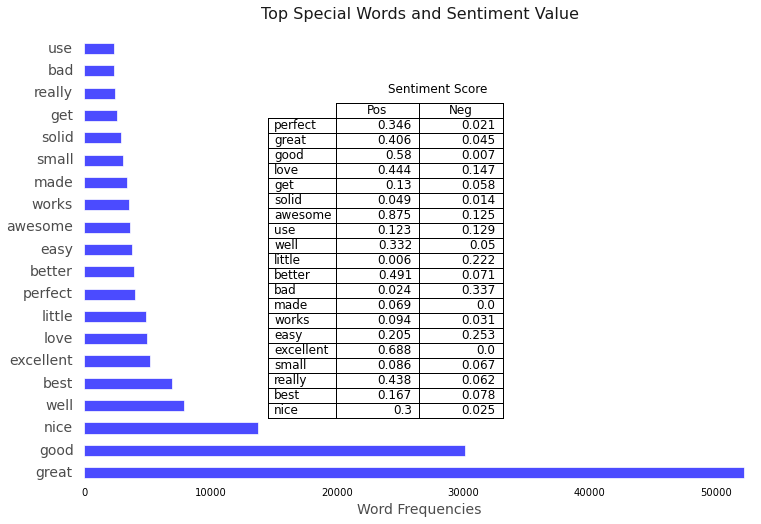

In [156]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

a = 0.7
top20_specialwords_in_summary.plot(kind="barh", ax=ax, alpha=a,
                                  legend=False, edgecolor="w")

ax.set_frame_on(False)
ax.set_title("Top Special Words and Sentiment Value", fontsize=16, alpha=0.9)
ax.title.set_position((0.5, 1.03))

ax.xaxis.set_ticks_position("none")
ax.yaxis.set_ticks_position("none")
ax.set_xlabel("Word Frequencies", fontsize=14, alpha=a)
ax.set_xlim(0, 53000)

col_labels = ['Pos','Neg']
row_labels = []
table_vals = []
for k, v in my_dic.iteritems():
    row_labels.append(k)
    table_vals.append(v)
    
the_table = plt.table(cellText=table_vals,
                  colWidths = [0.1]*2,
                  rowLabels=row_labels,
                  colLabels=col_labels,
                  loc='center')
the_table.set_fontsize(12)
the_table.scale(1.25, 1.25)
plt.text(24000,17,'Sentiment Score',size=12)

yticks = top20_specialwords_in_summary.index.tolist()
ax.set_yticklabels(yticks, fontsize=14, alpha=a)
ax.yaxis.set_tick_params(pad=12)

<p>We can expect that $16$ out of $20$ most common words have larger positive score than negitive score because over $85\%$ of reviews belong to thumb-up class. Now it is time to start sentiment model training.</p>

In [112]:
clean_data = review_data[["cleanReview_v2", "cleanSummary_v2", "sentiment"]]
clean_data = clean_data.rename(columns={"cleanReview_v2": 'cleanReview', "cleanSummary_v2": "cleanSummary"})
clean_data.head(2)

,cleanReview,cleanSummary,sentiment
0,came veru happy haved used already makes taking easy,good,1
1,using lost needed used prior know reliable decided sure enough good,well,1


In [113]:
from sklearn.model_selection import train_test_split
X_re_train, X_re_test, y_re_train, y_re_test = train_test_split(clean_data["cleanReview"], clean_data["sentiment"], 
                                                    test_size=0.33, random_state=42)

print len(X_re_train), len(X_re_test)
print len(y_re_train), len(y_re_test)

198545 97792
198545 97792


<h3>2. Bags of Words</h3>
<br>
* build a dictionary from words to fixed integer ID $j$.
* for each review $i$, count the number of occurrences of each word and store it in $X[i, j]$.
* because I have already broken sentence structure, I will implement word vectorization with 1-gram and 2-grams in later pipeline model.

In [114]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_re_train_count = count_vect.fit_transform(X_re_train)
X_re_train_count.shape

(198545, 50417)

<p>We extract 50,417 words in 198.545 reviews, we can check what are the words in the vocabulary.</p>

In [115]:
count_vect.vocabulary_.keys()[:10]

[u'fawn',
 u'goathead',
 u'insolid',
 u'woods',
 u'clotted',
 u'spiders',
 u'hanging',
 u'movementshielded',
 u'comically',
 u'localized']

In [116]:
count_vect.vocabulary_["lifing"]

23912

<h3>3. TF-IDF</h3>
<br>
<p>Term frequency-inverse document frequency is a weight used to evaluate how important a word is to a document in a collection or corpus.</p>
$$TF(t) = \frac{\mbox{(Number of times term t appears in a document)}}{\mbox{(Total number of terms in the document)}}$$
<br>
$$IDF(t) = \log(\frac{\mbox{Total number of documents}}{\mbox{ Number of documents with term t in it}})$$
<br>
$$weight(t) = TF(t) * IDF(t) $$
<p>IDF is more useful in topic-related classification. So I set `use_idf` to `False`.

In [117]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_re_train_count)
X_train_tfidf.shape

(198545, 50417)

<h3>4. Naive Bayes Classifier</h3>
<br>
<p>Naive Bayes is probably one of the most elegant machine learning algorithms out there that is of practical use. It proves to be quite robust to irrelevant features (all features must be independent of each other). It learns fast and predicts equally so. Meanwhile it does not require lots of storage.</p>
<p>The main reason why Naive Bayes is so robust is that it is not so much interested in the real probabilities, but only in the information which class is more likely to.</p>
$$C_{best}= argmax_{c \in \mathcal{C}} ( \log P(C=c) + \sum_kP(F_k|C=c)$$
<p>C represents Class, F represents Features.</p> 

<p>The Naive Bayes classifiers reside in sklean package. </p>

* __GaussianNB__: this assumes the features to be normally distributed. 
* __MultinomialNB__: this assumes the features to be occurrence counts. 
* __BernoulliNB__: this is similar to MultinomialNB, but more suited when using binary word occurrences.
<p>As we will mainly look at the word occurrences, for our purpose, MultinomialNB is best suited.</p>

In [118]:
%%time
from sklearn.naive_bayes import MultinomialNB
clf_nb = MultinomialNB().fit(X_train_tfidf, y_re_train)

Wall time: 114 ms


In [119]:
first_5 = clean_data.head(5)
first_5  # There left some blanks in cleanSummary field after cleaning process, I will deal with it later.

,cleanReview,cleanSummary,sentiment
0,came veru happy haved used already makes taking easy,good,1
1,using lost needed used prior know reliable decided sure enough good,well,1
2,like okay butt handy pushing back already need,,1
3,works better find actually think better regular hold,,1
4,purchased thinking maybe need special easily pop plates regular get plates really make,ok regular,1


In [120]:
# test on a small set
first_5_counts = count_vect.transform(first_5["cleanReview"])
first_5_tfidf = tfidf_transformer.transform(first_5_counts)
predicted = clf_nb.predict(first_5_tfidf)
for original, pred in zip(first_5["sentiment"], predicted):
    print str(original) + " vs " + str(pred)

1 vs 1
1 vs 1
1 vs 1
1 vs 1
1 vs 1


<h3>5. Building a Pipeline</h3>
<br>
<p>In order to make the vectorize $\Rightarrow$ transformer $\Rightarrow$ classifier easier to work with, sklean provides a Pipeline class that behaves like a compound classifier.</p>

In [121]:
%%time
from sklearn.pipeline import Pipeline
review_nb_clf = Pipeline([("vect", CountVectorizer(ngram_range=(1,2))),
                          ("tfidf", TfidfTransformer(use_idf=False)), 
                          ("clf", MultinomialNB(alpha=0.01))])
review_nb_clf = review_nb_clf.fit(X_re_train, y_re_train)

Wall time: 33.1 s


<h3>6. Evaluation on Test Set</h3>

In [122]:
predicted = review_nb_clf.predict(X_re_test)
np.mean(predicted == y_re_test)

0.85931364528795806

In [123]:
# It is a highly skewed distribution
y_re_test.value_counts(normalize=True)

 1    0.854262
 0    0.081326
-1    0.064412
Name: sentiment, dtype: float64

<p>At the first glance, $86\%$ is a good accurancy rate. But we are dealing with skewed classes in this classification problem. Accurancy might not be the best metric for determining the quality of the model. Even we always predict the review as thumb-up, it is correct $85\%$ of the time. Fortunately, precision and recall can help us out.</p>
* __Precision__: how many of the data records, which got classified as $C1$, actually are $C1$.
* __Recall__: the percentage of correctly classified $C1$ based on the overall number of $C1$ in data set.

In [124]:
from sklearn import metrics
metrics.confusion_matrix(y_re_test, predicted)

array([[  512,    83,  5704],
       [   84,   120,  7749],
       [   53,    85, 83402]])

In [125]:
target_names = ["thumb-down", "neutral", "thumb-up"]
print metrics.classification_report(y_re_test, predicted, target_names=target_names)

             precision    recall  f1-score   support

 thumb-down       0.79      0.08      0.15      6299
    neutral       0.42      0.02      0.03      7953
   thumb-up       0.86      1.00      0.92     83540

avg / total       0.82      0.86      0.80     97792



<p>It is not surprising that thumb-up class has good score in all aspects because it is predominant class in this skewed data set. For thumb-down class, $77\%$ classfied thumb-down are actually thumb-down. However, among all records in this class, only $8\%$ of them are correctly picked up. When predicting neutral class, this model is completely useless due to bad score on both precision and recall.</p>

<h3>7. Parameter Tuning Using Grid Search</h3>
<br>
<p>We can try to improve the model performance by tweaking the parameters of various components of the chain. Sklearn provides the method to run an exhaustive search of the best parameters on a grid of possible values.</p>

In [126]:
from sklearn.model_selection import GridSearchCV
# It is __ before the parameter name
parameters = {"vect__ngram_range": [(1, 1), (1, 3)], 
              "tfidf__use_idf": (True, False), 
              "clf__alpha": (1e-1, 1e-3)}

gs_nb_clf = GridSearchCV(review_nb_clf, parameters, n_jobs=-1)

gs_nb_clf = gs_nb_clf.fit(X_re_train, y_re_train)

gs_nb_clf.best_score_

0.85714573522375281

In [127]:
for param_name in sorted(parameters.keys()):
    print "%s: %r" % (param_name, gs_nb_clf.best_params_[param_name])

clf__alpha: 0.001
tfidf__use_idf: False
vect__ngram_range: (1, 3)


In [128]:
cv_clf = Pipeline([("vect", CountVectorizer(ngram_range=(1,3))),
                          ("tfidf", TfidfTransformer(use_idf=False)), 
                          ("clf", MultinomialNB(alpha=0.001))])
cv_clf = cv_clf.fit(X_re_train, y_re_train)

In [69]:
cv_predicted = cv_clf.predict(X_re_test)
print metrics.classification_report(y_re_test, cv_predicted, target_names=target_names)

             precision    recall  f1-score   support

 thumb-down       0.69      0.09      0.16      6299
    neutral       0.31      0.02      0.04      7953
   thumb-up       0.86      0.99      0.92     83540

avg / total       0.81      0.86      0.80     97792



<h3>8. SVM vs. Naive Bayes, Summary vs. Review</h3>

In [134]:
# After cleaning, there are some summaries is empty
clean_data = clean_data.replace("", np.nan)
clean_data = clean_data.dropna()
clean_data.head(3)

,cleanReview,cleanSummary,sentiment
0,came veru happy haved used already makes taking easy,good,1
1,using lost needed used prior know reliable decided sure enough good,well,1
4,purchased thinking maybe need special easily pop plates regular get plates really make,ok regular,1


In [135]:
from sklearn.model_selection import train_test_split
X_sum_train, X_sum_test, y_sum_train, y_sum_test = train_test_split(clean_data["cleanSummary"], clean_data["sentiment"], 
                                                    test_size=0.33, random_state=42)

print len(X_sum_train), len(X_sum_test)
print len(y_sum_train), len(y_sum_test)

161053 79326
161053 79326


In [136]:
%%time
from sklearn.linear_model import SGDClassifier
review_svm_clf = Pipeline([("vect", CountVectorizer()),
                           ("tfidf", TfidfTransformer()), 
                           ("clf", SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5, random_state=42))])
_ = review_svm_clf.fit(X_sum_train, y_sum_train)

Wall time: 1.64 s


In [138]:
svm_predicted = review_svm_clf.predict(X_sum_test)
np.mean(svm_predicted == y_sum_test)

0.86336131911353153

In [139]:
metrics.confusion_matrix(y_sum_test, svm_predicted)

array([[  125,    19,  4691],
       [   43,   239,  5962],
       [   19,   105, 68123]])

In [140]:
%%time
# So far it is the best model
summary_nb_clf = Pipeline([("vect", CountVectorizer(ngram_range=(1,3), max_features=2000)),
                          ("tfidf", TfidfTransformer(use_idf=False)), 
                          ("clf", MultinomialNB(alpha=0.01))])
summary_nb_clf = summary_nb_clf.fit(X_sum_train, y_sum_train)

Wall time: 2.5 s


In [141]:
sum_nb_predicted = summary_nb_clf.predict(X_sum_test)
np.mean(sum_nb_predicted == y_sum_test)

0.8718705090386506

In [142]:
print metrics.classification_report(y_sum_test, sum_nb_predicted, target_names=target_names)

             precision    recall  f1-score   support

 thumb-down       0.62      0.20      0.30      4835
    neutral       0.57      0.07      0.13      6244
   thumb-up       0.88      0.99      0.93     68247

avg / total       0.84      0.87      0.83     79326



In [143]:
parameters = {"vect__ngram_range": [(1, 1), (1, 2)], 
              "tfidf__use_idf": (True, False), 
              "clf__alpha": (1e-1, 1e-4)}

gs_nb_sum_clf = GridSearchCV(summary_nb_clf, parameters, n_jobs=-1)

gs_nb_sum_clf = gs_nb_sum_clf.fit(X_sum_train, y_sum_train)

gs_nb_sum_clf.best_score_

0.87220356031865287

In [144]:
for param_name in sorted(parameters.keys()):
    print "%s: %r" % (param_name, gs_nb_sum_clf.best_params_[param_name])

clf__alpha: 0.0001
tfidf__use_idf: False
vect__ngram_range: (1, 2)


In [145]:
summary_nb_cv_clf = Pipeline([("vect", CountVectorizer(ngram_range=(1,2))),
                            ("tfidf", TfidfTransformer(use_idf=False)), 
                            ("clf", MultinomialNB(alpha=0.0001))])
_ = summary_nb_cv_clf.fit(X_sum_train, y_sum_train)

In [147]:
sum_nb_cv_predicted = summary_nb_cv_clf.predict(X_sum_test)
np.mean(sum_nb_cv_predicted == y_sum_test)

0.86699190681491567

In [148]:
metrics.confusion_matrix(y_sum_test, sum_nb_cv_predicted)

array([[ 1192,   254,  3389],
       [  423,   670,  5151],
       [  563,   771, 66913]])

In [149]:
print metrics.classification_report(y_sum_test, sum_nb_cv_predicted, target_names=target_names)

             precision    recall  f1-score   support

 thumb-down       0.55      0.25      0.34      4835
    neutral       0.40      0.11      0.17      6244
   thumb-up       0.89      0.98      0.93     68247

avg / total       0.83      0.87      0.84     79326



<p>This is still not a perfect model. However it improved a little bit on predicting two minor classes as compared to the first model. In my future work, </p>
1. I will try to fix skewness issue by oversampling minority classes with SMOTE.
2. mash up the sentiment score with words in summary to improve the metrics of model. 
3. learn a model to filter thumb-up reviews out first, then train another model just for seperating thumb-down and neutral classes.